# Project: Investigate a Dataset - [No_Show_Appointment]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
 This dataset collects information from 100k medical appointments in Brazil. A number of characteristics about the patient are included in each row.

'ScheduledDay' tells us on what day the patient set up their appointment.
'Neighborhood' indicates the location of the hospital.
'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
'No_show' indicates whether the patients showed up for their appointment or not. Then the  encoding of the  column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.


### Question(s) for Analysis
Q1:Does the  Neighbourhood of an hospital affect people not turning up for their appointment?

Q2:Does being handicap affect people from showing up for their appointment?

Q3:Do people who recieve sms show up for their appointment?

Q4: Does age  affect people's turn-up for their appointment?

In [2]:
#importing all neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


In [91]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.3MB/s eta 0:00:010% |                                | 20kB 11.0MB/s eta 0:00:01    5% |█▋                              | 532kB 24.9MB/s eta 0:00:01    25% |████████                        | 2.6MB 20.7MB/s eta 0:00:01    34% |███████████▏                    | 3.6MB 20.3MB/s eta 0:00:01    43% |██████████████                  | 4.6MB 20.0MB/s eta 0:00:01    62% |████████████████████            | 6.6MB 18.9MB/s eta 0:00:01    72% |███████████████████████         | 7.5MB 19.7MB/s eta 0:00:01    81% |██████████████████████████      | 8.5MB 20.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.1MB/s eta 0:00:01   26% |████████▍                       | 3.5MB 20.9MB/s eta 0:00:01    33% |██████████▊                     | 4.5MB 19.1MB/s eta 0:00:01    54% |█████████████████▍              | 7.3MB 18.8MB/s eta 0:00:01    68% |█████████████████████▉          | 9.1MB 19.1MB/s eta 0:00:01
tensorflow 1.3.0 requires tensorflow-t

<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
# loading the dataset into the notebook and then exploring the dataset's properties
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0             0      No  
2         0           0        0             0      No  
3         0           0        0             0      No  
4         1           0        0             0      No

#### Step 1
Checking the shape of the dataset to know the number of rows and columns

In [17]:
df.shape

(110527, 14)

#### Step 2
Knowing the general description of the dataset

In [18]:
df.describe()

PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172614e+12   5.640286e+06      18.000000       0.000000   
50%    3.173184e+13   5.680573e+06      37.000000       0.000000   
75%    9.439172e+13   5.725524e+06      55.000000       0.000000   
max    9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       4.000000   

        SMS_received  
count  110527.000000  
mean        0.321026  
std         0.466873  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000

#### Step 3
Find the the information of the dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Step 4
To check whether there are any duplicates.

In [20]:
sum(df.duplicated())

0

#### Step 5
To get a general graph of all the columns in the dataset

In [53]:
df.hist(figsize=(10,8));


### Data Cleaning


After a careful observation of the properties of the data. Some columns will be dropped, the No-show name changed and  the value of the No-show column changed.

In [4]:
#Removing the PatientId, AppointmentID columns from the general dataset
data = ['PatientId','AppointmentID']
df.drop(data,axis=1,inplace= True)
df.tail(20)

Gender          ScheduledDay        AppointmentDay  Age  \
110507      F  2016-06-08T09:04:18Z  2016-06-08T00:00:00Z    0   
110508      F  2016-06-01T09:41:00Z  2016-06-01T00:00:00Z   59   
110509      M  2016-06-08T08:50:51Z  2016-06-08T00:00:00Z   33   
110510      F  2016-06-01T09:35:48Z  2016-06-01T00:00:00Z   64   
110511      F  2016-06-08T08:50:20Z  2016-06-08T00:00:00Z   14   
110512      F  2016-06-08T08:20:01Z  2016-06-08T00:00:00Z   41   
110513      M  2016-06-08T07:52:55Z  2016-06-08T00:00:00Z    2   
110514      F  2016-06-08T08:35:31Z  2016-06-08T00:00:00Z   58   
110515      M  2016-06-06T15:58:05Z  2016-06-08T00:00:00Z   33   
110516      F  2016-06-07T07:45:16Z  2016-06-08T00:00:00Z   37   
110517      F  2016-06-07T07:38:34Z  2016-06-07T00:00:00Z   19   
110518      F  2016-04-27T15:15:06Z  2016-06-07T00:00:00Z   50   
110519      F  2016-04-27T15:23:14Z  2016-06-07T00:00:00Z   22   
110520      F  2016-05-03T07:51:47Z  2016-06-07T00:00:00Z   42   
110521      F  2016-05-03T08:23:40Z  2016-06-07T00:00:00Z   53   
110522      F  2016-05-03T09:15:35Z  2016-06-07T00:00:00Z   56   
110523      F  2016-05-03T07:27:33Z  2016-06-07T00:00:00Z   51   
110524      F  2016-04-27T16:03:52Z  2016-06-07T00:00:00Z   21   
110525      F  2016-04-27T15:09:23Z  2016-06-07T00:00:00Z   38   
110526      F  2016-04-27T13:30:56Z  2016-06-07T00:00:00Z   54   

          Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
110507      MARIA ORTIZ            0             0         0           0   
110508      MARIA ORTIZ            0             0         0           0   
110509      MARIA ORTIZ            0             0         0           0   
110510     SOLON BORGES            0             0         0           0   
110511      MARIA ORTIZ            0             0         0           0   
110512      MARIA ORTIZ            0             0         0           0   
110513  ANTÔNIO HONÓRIO            0             0         0           0   
110514      MARIA ORTIZ            0             0         0           0   
110515      MARIA ORTIZ            0             1         0           0   
110516      MARIA ORTIZ            0             0         0           0   
110517      MARIA ORTIZ            0             0         0           0   
110518      MARIA ORTIZ            0             0         0           0   
110519      MARIA ORTIZ            0             0         0           0   
110520      MARIA ORTIZ            0             0         0           0   
110521      MARIA ORTIZ            0             0         0           0   
110522      MARIA ORTIZ            0             0         0           0   
110523      MARIA ORTIZ            0             0         0           0   
110524      MARIA ORTIZ            0             0         0           0   
110525      MARIA ORTIZ            0             0         0           0   
110526      MARIA ORTIZ            0             0         0           0   

        Handcap  SMS_received No-show  
110507        0             0      No  
110508        0             0      No  
110509        0             0      No  
110510        0             0      No  
110511        0             0      No  
110512        0             0      No  
110513        0             0      No  
110514        0             0      No  
110515        0             0     Yes  
110516        0             0     Yes  
110517        0             0      No  
110518        0             1      No  
110519        0             1      No  
110520        0             1      No  
110521        0             1      No  
110522        0             1      No  
110523        0             1      No  
110524        0             1      No  
110525        0             1      No  
110526        0             1      No

In [5]:
#changing the column name of  No-show
df = df.rename(columns = {'No-show':'No_show'})
df = df.rename(columns = {'Hipertension':'Hypertension'})
df = df.rename(columns = {'Handcap':'Handicap'})
df.head()

Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMS_received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   
2            0             0         0           0         0             0   
3            0             0         0           0         0             0   
4            0             1         1           0         0             0   

  No_show  
0      No  
1      No  
2      No  
3      No  
4      No

In [6]:
#changing the values of  of 'yes' and 'no' to '1' and '0'
df.No_show.replace(('Yes', 'No'), (1, 0), inplace=True)
df.head()

Gender          ScheduledDay        AppointmentDay  Age      Neighbourhood  \
0      F  2016-04-29T18:38:08Z  2016-04-29T00:00:00Z   62    JARDIM DA PENHA   
1      M  2016-04-29T16:08:27Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   
2      F  2016-04-29T16:19:04Z  2016-04-29T00:00:00Z   62      MATA DA PRAIA   
3      F  2016-04-29T17:29:31Z  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI   
4      F  2016-04-29T16:07:23Z  2016-04-29T00:00:00Z   56    JARDIM DA PENHA   

   Scholarship  Hypertension  Diabetes  Alcoholism  Handicap  SMS_received  \
0            0             1         0           0         0             0   
1            0             0         0           0         0             0   
2            0             0         0           0         0             0   
3            0             0         0           0         0             0   
4            0             1         1           0         0             0   

   No_show  
0        0  
1        0  
2        0  
3        0  
4        0

In [7]:
df.query('Neighbourhood== "ILHAS OCEÂNICAS DE TRINDADE"')
df.drop([48754,48765],axis=0,inplace=True)

This cells were dropped because during my exploration on Neighbourhood this paticular cells gave me a value error: could not convert str to float :  "ILHAS OCEÂNICAS DE TRINDADE". and I did not know how to fix that, so I droped the cells. But I ran the code in my local server and it did not give me any errors, so I just saw this as the best idea.

<a id='eda'></a>
## Exploratory Data Analysis

### Q1:Does the  Neighbourhood of the Hospital affect people not turning up for their appointment?

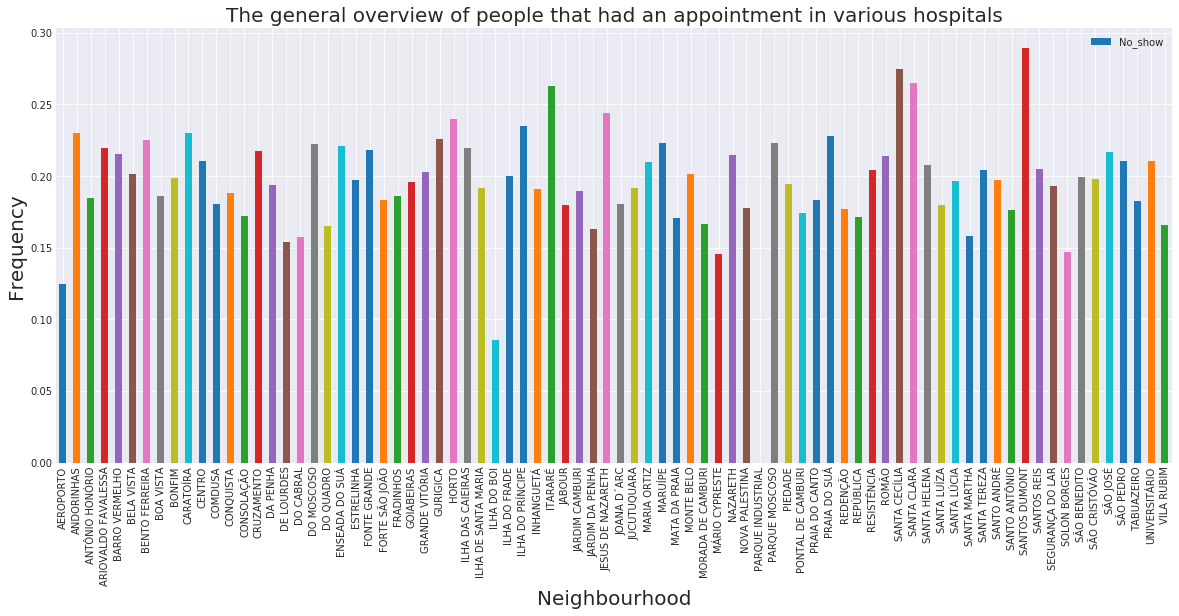

In [115]:
# NB: the one's in the column of NO_show actually indicates 
#that the patient did not show up for there appointment
df.groupby('Neighbourhood').No_show.mean()
df.groupby('Neighbourhood').No_show.mean().plot(kind='bar',figsize=(20,8))
plt.title('The general overview of people that had an appointment in various hospitals',fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xlabel('Neighbourhood',fontsize=20)
plt.legend();

From the above graph it can be shown how many people actually had an appointment with various hospitals.

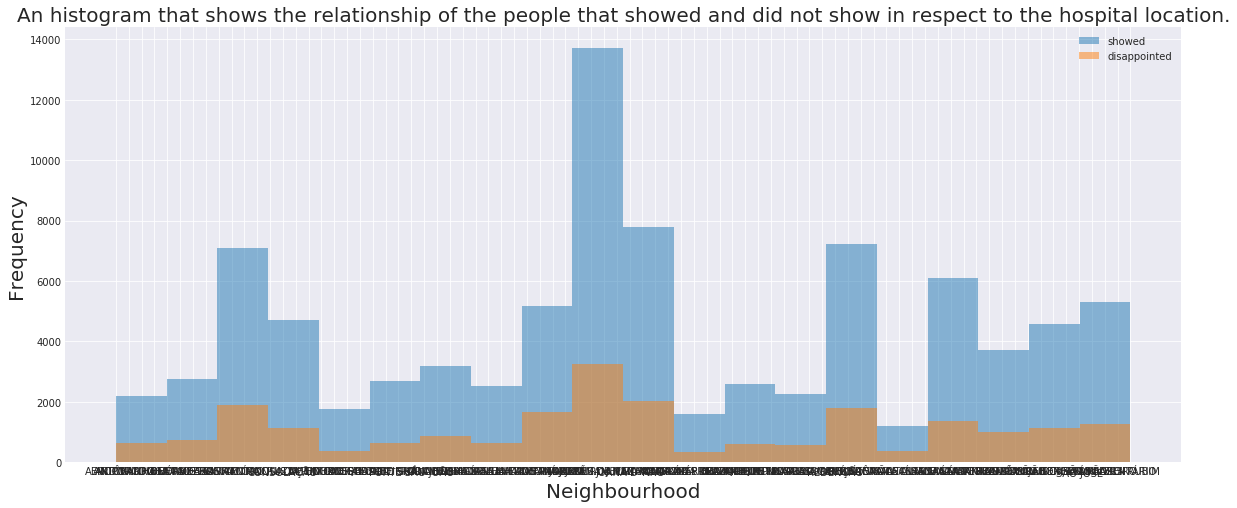

In [14]:
#Breaking down the general overview of the graph to have a more deeper insight
#into the neighbourhoods that actually turned up for their appointment and did not turn up for their appointment
disappointed = df.No_show == True
showed = df.No_show == False
#defining hist_chart function
def   hist_chart(arg1,arg2,arg3,arg4,arg5):
    arg1.hist(alpha = 0.5, bins=20, label = 'showed',figsize =(20,8))
    arg2.hist(alpha = 0.5, bins=20, label = 'disappointed',figsize =(20,8))
    plt.title(arg3,fontsize=20)
    plt.ylabel(arg4,fontsize=20)
    plt.xlabel(arg5,fontsize=20)
    plt.legend();
#using the  hist_chart  function
hist_chart(df.Neighbourhood[showed],df.Neighbourhood[disappointed],'An histogram that shows the relationship of the people that showed and did not show in respect to the hospital location.','Frequency','Neighbourhood')


This graph dives deeper to show the people that showed up for their appointment and did not show up for the appointment in the hospital neighbourhood.

Limitaions: I dont know of a better way to seperate the name for a proper visualization.

In [13]:
#creating a pie chart to show the hospital that people showed up for their appointment.
#defining a  pie_chart functioin
def pie_chart(arg1,arg2,arg3):
    arg1.value_counts().plot(kind = 'pie',figsize = (120,120),fontsize=80)
    plt.title(arg2,fontsize=100)
    plt.xlabel(arg3,fontsize=100)
    plt.legend();
#using the pie_chart funtion
pie_chart(df.Neighbourhood[showed],'Plotting a pie chart to know the hospital that had the largest number of turn-up','Neighbourhood')        


From the Piechart I can now deduce the neigbourhood of the hospital that had much people that showed up for their appointment. And Jardim Camburi had the largest number of people that showed

Limitaions: I could not find a better way to make the names not cluster together.

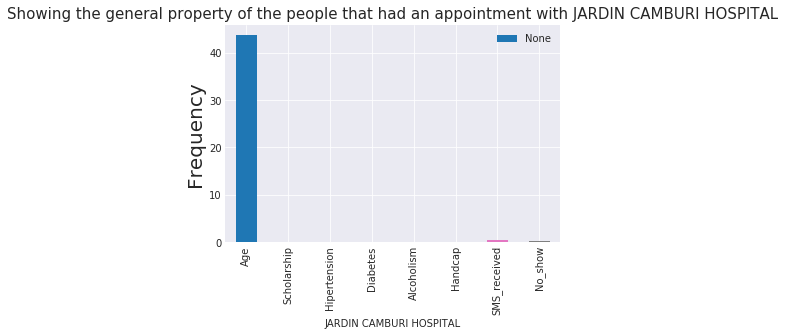

In [107]:
#investigating the properties that made people come for their appointment in Jardim Camburi Location.
df_m = df.query('Neighbourhood == "JARDIM CAMBURI"')
df_m.mean().plot(kind='bar')
plt.title('Showing the general property of the people that had an appointment with JARDIN CAMBURI HOSPITAL',fontsize=15)
plt.ylabel('Frequency',fontsize=20)
plt.xlabel('JARDIN CAMBURI HOSPITAL')
plt.legend();

After viewing the graph it can be shown that Age, Sms were two factors relating to the turn up of people. That is, people within the age of (0-45)  and a little relationship with people that recieved Sms.

### Q2: Does being Handicap affect people showing up for their appointment?

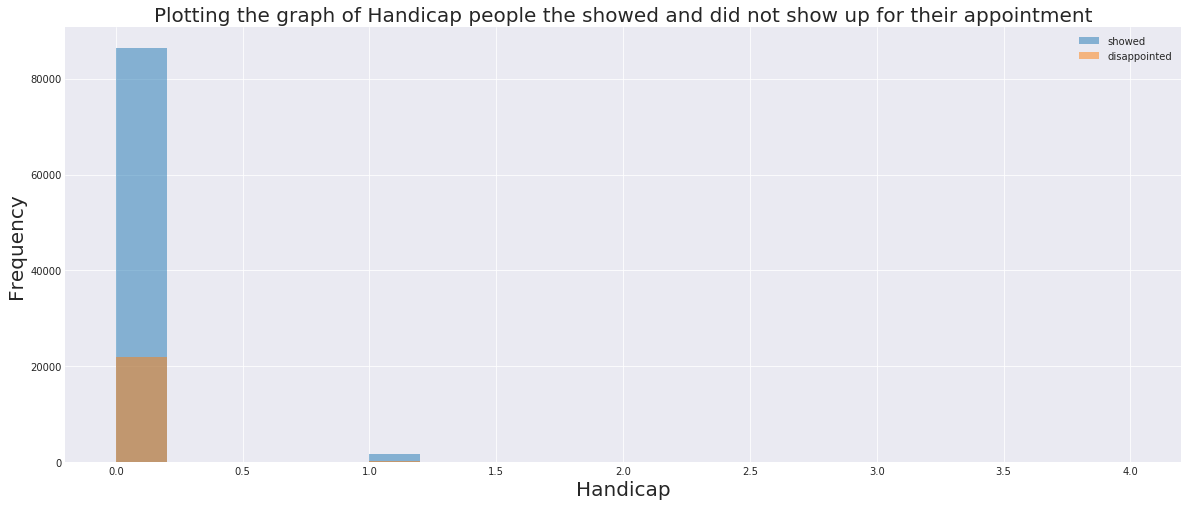

In [9]:
#investigating the factors that made the neighbourhood show up for their appointment 
#Looking at being handicapped
#using the hist_chart function 
hist_chart(df.Handicap[showed],df.Handicap[disappointed],'Plotting the graph of Handicap people the showed and did not show up for their appointment','Frequency','Handicap')


The gtaph above shows us that more people that were handicap showed up for their appointment.

0    86374
1     1676
2      146
3       10
4        2
Name: Handicap, dtype: int64


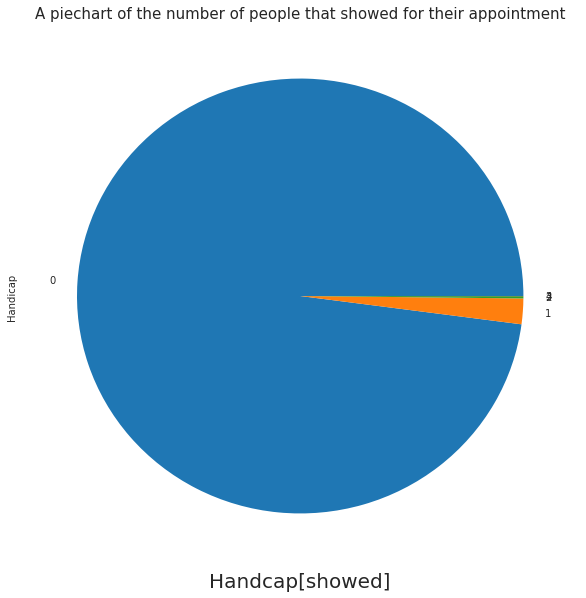

In [27]:
#Trying to understand the ratio of  Handicap people that showed up for their appointment
print(df.Handicap[showed].value_counts())
#defining  pie_chart1 function 
def pie_chart1(arg1,arg2,arg3):
    arg1.value_counts().plot(kind = 'pie',figsize = (10,10),fontsize=10)
    plt.title(arg2,fontsize=15)
    plt.xlabel(arg3,fontsize=20)
    plt.show();
pie_chart1(df.Handicap[showed],'A piechart of the number of people that showed for their appointment','Handcap[showed]')

From the about chart, it can be seen that people that were not Hamdicap showed up more for there appointment than people that were handicapped.

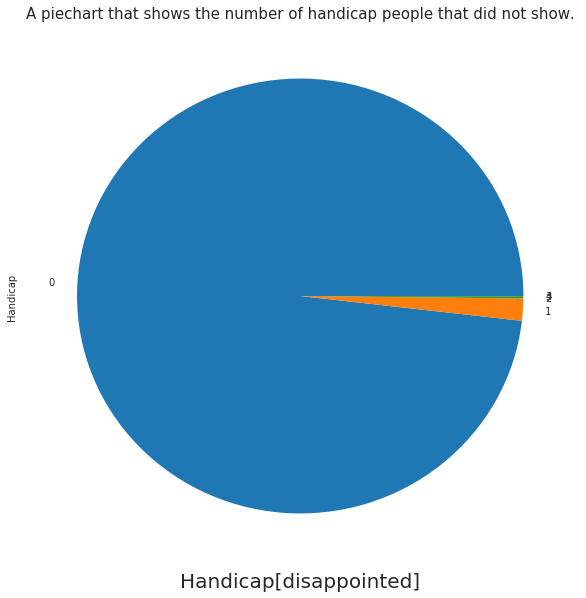

In [28]:
#This is to check for the ratio of the handicap people that did not show up for their appointment
#using the pie_chart1 function 
pie_chart1(df.Handicap[disappointed],'A piechart that shows the number of handicap people that did not show.','Handicap[disappointed]')

Based on the findings, the chart resembles the first chart of the handicap people that showed up for their appointment.Therefore, there is not much relationship with handicap people showing up for their appointment. Because the people that were not handicapped did not also show up for their appointment

### Q3: Do people who recieve SMS show up for their appointment?

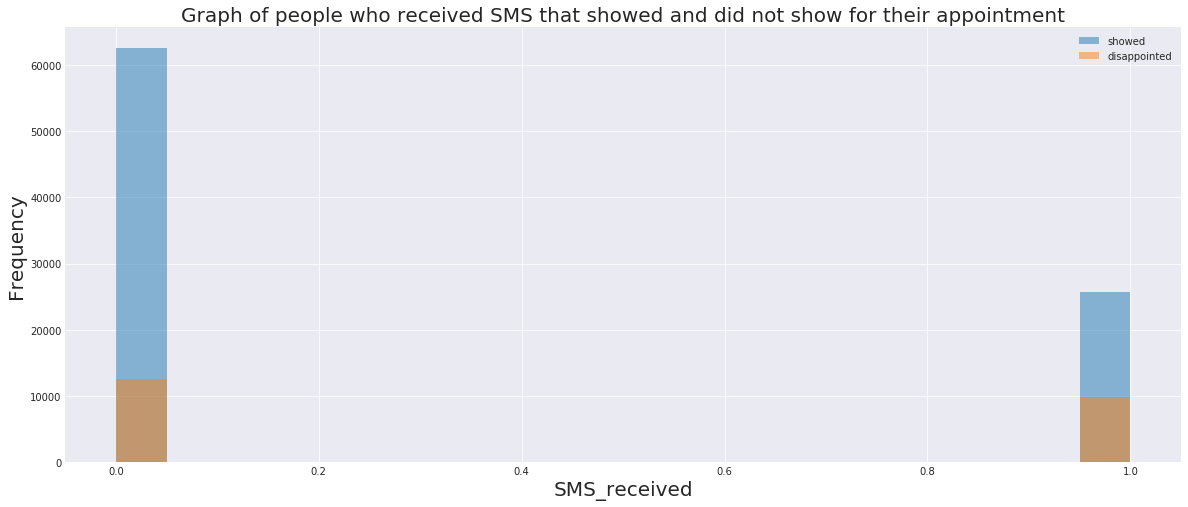

In [10]:
#Plotting a general histogram of people who received SMS and showed with people who did not show
#using the hist_chart function defined to  plot the graph
hist_chart(df.SMS_received[showed],df.SMS_received[disappointed],'Graph of people who received SMS that showed and did not show for their appointment','Frequency','SMS_received')

This shows that people who received SMS showed up for their appointment than disappointed.But further investigation is needed to understand it better.

0    62510
1    25698
Name: SMS_received, dtype: int64


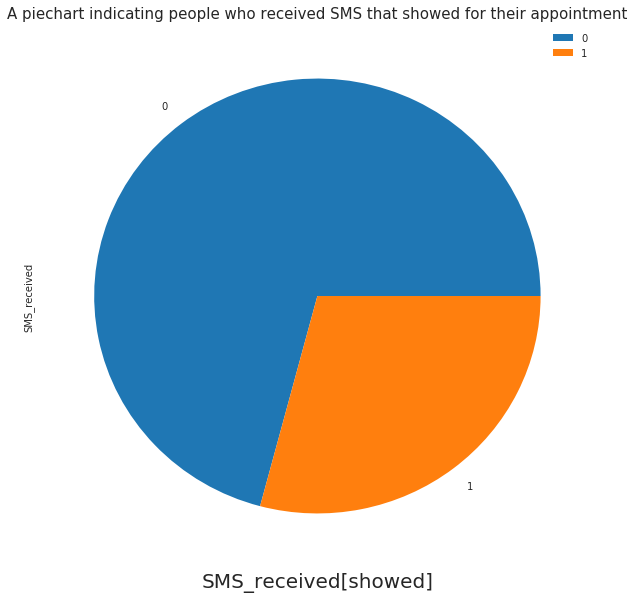

In [19]:
print(df.SMS_received[showed].value_counts())
#using the pie_chart1  function  
pie_chart1(df.SMS_received[showed],'A piechart indicating people who received SMS that showed for their appointment','SMS_received[showed]')

From the above chart people who did not receive SMS showed up for their appointment than people who actually received the SMS. But still it still shows us that people who receive the SMS shows up.

### Q4: Does age affect people's turn-up for their appointment?

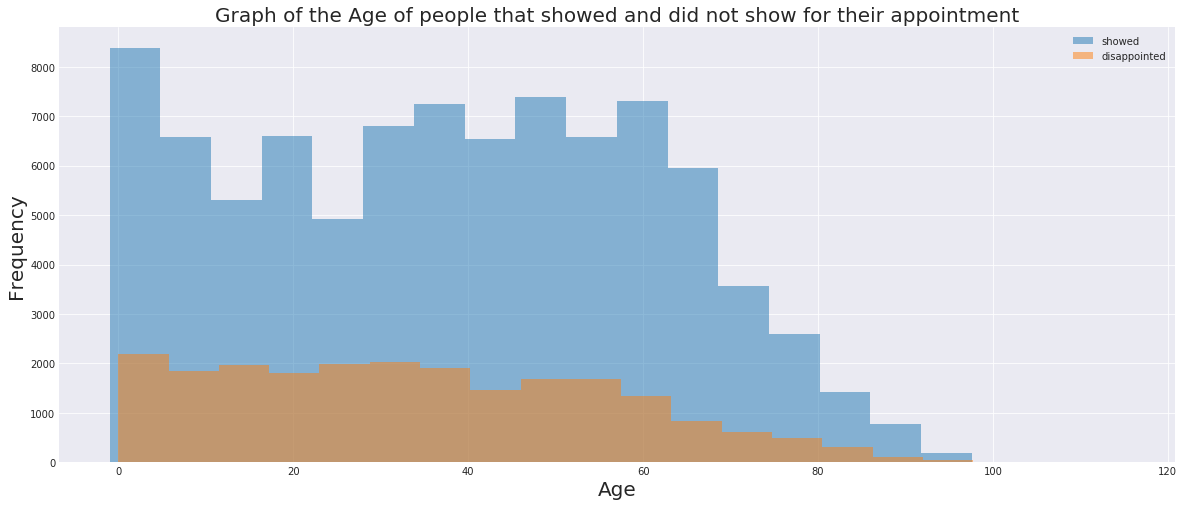

In [11]:
#investigating  how the age of people aftected there turnup for there apointnment
#using the hist_chart function
hist_chart(df.Age[showed],df.Age[disappointed],'Graph of the Age of people that showed and did not show for their appointment','Frequency','Age')

The graph shows that as the age increases there are lesser people who show up for their appointment. And as you can see the (Age 0) has the largest turnup for the appointment. Maybe, because they were newly born babes.

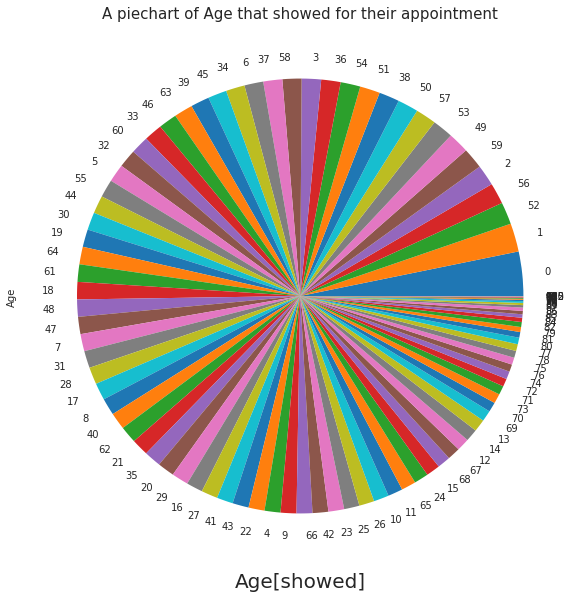

In [29]:
#investigating with a pie chart  to really tell us more about which age showed up for their appointment
#using the pie_chart1 function
pie_chart1(df.Age[showed],'A piechart of Age that showed for their appointment','Age[showed]')

This still tell us that the Age 0 were at the hospital for their appointment.

Limitaions: I could not find a better way not to make the values not cluster together.

<a id='conclusions'></a>
## Conclusions
1.)  I found that the Neighbourhood that had the largest number of turn-up was influenced by the age and sms received. The limitation that I observed was that there could have been and information about the address of the people .Because there could be people living very far from the hospital neighbourhood that made them not to come.

2.) I found that being handicap did not affect people for coming to the hospital.

3.) I found that people who recieved sms tends to show up for their appointment.

4.) I found that people at the younger age tend to show up for their appointment than the elderly folks. Then the limitation I saw was that not much information was giving to know why the older folks who are suppose to be the one  having regular checkup and not missing their appointment are the ones that did not come for their appointment.




In [143]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0